# Review: solvability and conditioning of linear problems

## (Warning: may contain some practical functional analysis)

Suppose we want to solve $F x = d$, where $x\in V$, $d \in W$, $V$ and $W$ are vector spaces, and $F$ is a linear map (aka a linear operator).

- How do we formally define a vector space?

1. We can add vectors: there is an operation $+:V\times V \to V.$ that has a lot of the same rules as adding real numbers (it is an [Abelian group](https://en.wikipedia.org/wiki/Abelian_group)):

  * x + (y + z) = (x + y) + z [Associativity]
  * x + y = y + x [Commutativity]
  * There is a zero vector $0_V$: $0_V + v = v$
  * Every $v$ has a $-v$ where $v + (-v) = 0_V$
2. We can scale vectors: for every $\alpha \in \mathbb{R}$ [we'll just look at real vector spaces for simplicity]
and vector $v$ $\alpha v$ is another vector.

  * $\alpha(\beta v) = (\alpha \beta) v$ [Associativity, again]
  * $(\alpha + \beta) v = \alpha v + \beta v$ [Distribution over scalar addition]
  * $\alpha (v + w) = \alpha v + \alpha w$ [Distribution over vector addition]
  * $1 v = v$ [Preservation of identity]
  
**Exercise:** can you use these properties to prove $0v = 0_V$?

**Exercise:** can you use these properties to prove $(-1) v = -v$?

- What does it mean for $F$ to be linear?

1. $F(\alpha v) = \alpha F(v)$
2. $F(v + w) = F(v) + F(w)$

**Exercise:** can you use these properties to prove $F(0_V)= 0_W$?

We will use $L(V,W)$ to indicate the set of linear maps from $V$ to $W$: $F\in L(V,W)$.

- Is $L(V,W)$ a vector space?

Yes!  Here's a sketch of a proof.

1. Define $(F + G): V \to W$ for $F,G \in L(V,W)$ by $(F + G)(v) = (F(v)) + (G(v))$. Prove $(F + G) \in L(V,W)$ (does it satisfy the definition of what it means to be linear?).
2. Define $(\alpha F): V \to W$ for $F\in L(V,W)$ by $(\alpha F)(v) = \alpha(F(v))$. Prove $(\alpha F) \in L(V,W)$.
3. Define $0_{L(V,W)}$ by $0_{L(V,W)}(v) = 0_W$.  Prove $0_{L(V,W)} \in L(V,W)$.
4. Pick any axiom of a vector space.  It will have the form $O_L(x_1,\dots,x_n) = O_R(x_1,\dots,x_n)$, where $O_L$ and $O_R$ are vector arithmetic expressions yielding vectors.  Pick a fixed $v\in V$.  If we suppose
$x_i\in L(V,W)$, our definitions 1--3 above imply $O_L(x_1,\dots,x_n)(v) = O_L(x_1(v),\dots,x_n(v))$.  
5. $x_i(v)\in W$, so the fact that $W$ is a vector space implies that the axioms are satisfied
$O_L(x_1(v),\dots,x_n(v)) = O_R(x_1(v),\dots,x_n(v))$.
6. Reversing step 4, our definitions 1--3 above imply $O_R(x_1(v),\dots,x_n(v))=O_R(x_1,\dots,x_n)(v)$.
7. Therefore $O_L(x_1,\dots,x_n)(v) = O_R(x_1,\dots,x_n)(v)$ for every $v$.  They are thus the same map,
$O_L(x_1,\dots,x_n) = O_R(x_1,\dots,x_n)$.  Therefore our definitions of vector addition and scalar multiplication
satisfy the vector space axioms.

[You have probably encountered the fact that $L(V,W)$ is a vector space before in the fact that a matrix $M\in\mathbb{R}^{n\times m}$
can be scaled and two matrices of the same dimension $M_1,M_2\in\mathbb{R}^{n\times m}$ can be added.  Matrices
are linear operators: $\mathbb{R}^{n\times m} \sim L(\mathbb{R}^m,\mathbb{R}^n)$.]

## Pure Algebra

In [2]:
import numpy as np
from numpy.random import randn, randint
from numpy.linalg import norm, inv, solve

F = randn(randint(10,16),randint(10,16))
d = randn(F.shape[1])

x = solve(F,d)
x

LinAlgError: Last 2 dimensions of the array must be square

- What does it mean for "Solve $Fx=d$" to be **well-posed**? Keep in mind that well-posedness is not a universal concept for all problems.  The problem that I have specified so far is purely algebraic: $V$ and $W$ do not have:
  * inner products,
  * norms,
  * metrics,
  * topologies,
  * or even finite dimensions!

- A solution to $Fx=d$ exists (if this is true for every $d$, we will say that $F$ is *surjective*)
- The solution is unique ($F$ is *injective*)
- [An operator that is injective and surjective is *bijective*]

- if $d$ is in the range of $F$, then a solution exists, then it is a well-posed problem as long as $F$ is injective.

[Discussion about well-posedness: any definition of well-posedness talks about a class of problems, where
some of the data is fixed, and some ranges over a domain: the problem is well-posed if existence and uniqueness are true for each possible choice in the domain.  Generally when we try to
answer the question "Is 'Solve $Fx=d$ well-posed?" we mean $F$ is fixed and $d$ ranges over $W$, but
sometimes we may ask the question for $d$ chosen from a subset of $W$ (such as a the set containing
just $d$, $\{d\}$, or a subspace of $W$)]

[A quick aside about **infinite dimensional** spaces:

This class is about not only the theory of inverse problems and uncertainty quantification,
 but what methods work in practice.  So why will we spend time on infinite dimensional vector spaces, when we (hopefully) will not encountering them in practice?

The answer is, roughly, for the same reason that our results will use real numbers, even though we will never encounter irrational real numbers in computation.  Some problems have solutions that can't be described explicitly in a finite amount of information. 
Infinite dimensional spaces are a useful tool for describing those solutions.  The descriptions are useful because they motivate real computational methods, generating finitely-computable approximate solutions
that are *like* the true solution.

The important thing to keep in mind: when we assume a vector space $V$ is finite-dimensional, how does $\dim(V)$ factor into our algorithms?  If their are terms that
are $\Omega(\dim(V)^{k})$ for $k > 1$, we have to worry about how the scalability of the algorithm limits our ability to approximate the true solution.]

Suppose (for the moment) that we have access to *exact arithmetic* and $V$ and $W$ are finite-dimensional:

- How (i.e. with what algorithm) do we determine if "Solve $Fx=d$" is well-posed for a fixed $F$ and $d$?
- How do we determine if "Solve $Fx=d$" is well-posed for fixed $F$ and general $d$?
  (There are two parts to the definition of well-posed.  For each one, there is an integer
  we can compute that characterizes $F$: what are those integers, and how (could) we
  compute them)?

1. If $\dim(V)=\dim(W)$, we could just try a solution method (like Gaussian elimination) and see if it breaks down.

2. Every $F$ has to have a **nullspace** or **kernel:** some set of vectors $\ker(F)\subseteq V$
such that $F (v) = 0_W$ for all $v\in\ker(F)$. If there is $v\in\ker(F)\neq 0_v$,
and $Fx=d$ is a solution, then $F(x + \alpha v) = d$ for every $\alpha$, so a solution cannot be unique.
Conversely if $\ker(F) = \{0_V\}$ and $Fx = d = Fy$, then $F(x-y) = 0_W$, so $x-y=0_V$ and thus $x=y$.
Therefore, if a solution exists, it is unique.  A number that we can compute is the **nullity**, or **dimension of the nullspace**,
$$\dim(\ker(F)).$$

3. The set of all vectors $w$ such that there is $Fv = w$ is called the **range** or **image** of $F$ ($\mathrm{Im}(F)$): it is a subspace of $W$.
The **rank** of $F$ ($\mathrm{rank}(F)$) is the **dimension of its range**, $$\dim(\mathrm{Im}(F)).$$ If $\dim(\mathrm{Im}(F)) < \dim(W),$ then there must be $w \in W$ such that $Fv \neq w$ for all $v\in V$.  In such a case the solution does not exist.

4. Summarizing:
  * If $\dim(\ker(F)) > 0$, then a solution (if it exists) cannot be unique.
  * If $\dim(\ker(F)) = 0$, then a solution (if it exists) must be unique.
  * If $\dim(W) - \dim(\mathrm{Im}(F)) > 0$, then a solution exists if and only if $d\in\mathrm{Im}(F)$.
  * If $\dim(W) - \dim(\mathrm{Im}(F)) = 0$, then a solution always exists.
  * Well-posedness for a fixed $d$ means $\dim(\ker(F)) = 0$ and $d\in \mathrm{Im}(F)$.
  * Well-posedness for generic $d$ means $\dim(\ker(F)) = 0$ and $\dim(\mathrm{Im}(F))=\dim(W)$.
  
5. How can we compute $\dim(\mathrm{Im})(F)$ in practice when $F$ is a matrix?  Each $F$ has a [QR factorization](https://en.wikipedia.org/wiki/QR_decomposition), $$F = QR,$$ where $Q$ is orthonormal (more on that below when we talk about the SVD) and $R$ is upper triangular.  The number of nonzero entries on the diagonal of $R$ is the rank of $F$.  When we go about computing $Q$ and $R$ in practice, we make numerical rounding errors, which can lead to errors in the computed rank.  There's no silver bullet, but libraries for scientific computing (like `scipy`) provide good algorithms that try to mitigate this using a related factorization, the [rank revealing QR factorization](https://en.wikipedia.org/wiki/RRQR_factorization).  For example (sourced from [Andreas Klöckner](https://andreask.cs.illinois.edu/cs598apk-f15/demos/02-tools-for-low-rank/Rank-Revealing%20QR.html)): let's create a matrix with rank $r$ (almost surely):

In [44]:
%matplotlib inline

from scipy.linalg import qr
import matplotlib.pyplot as plt

r = randint(10,16)

print(r)

m = r + randint(10,16)
n = r + randint(10,16)

K = randn(r,)
A = randn(n,r)
B = randn(r,m)
F = A.dot(np.diag(K).dot(B))

14


Even though we tried to obscure it, the rank revealing QR should be able to recover the rank:

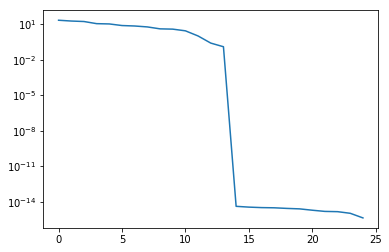

In [47]:
Q,R,P = qr(F, pivoting = True)

plt.semilogy(np.abs(np.diag(R)))

6. How can we compute $\dim(\ker(F))$ in practice?  An important fact about matrices is
$$\dim(\ker(F)) = \dim(V) - \dim(\mathrm{Im}(K^T)).$$

[This is a consequence of an important theorem called the [Fredholm Alternative](https://en.wikipedia.org/wiki/Fredholm_alternative), which we may discuss.]

Another important fact is that $$\dim(\mathrm{Im}(K)) = \dim(\mathrm{Im}(K^T)).$$

So from the rank revealing QR decomposition above, we also learn the dimension of the nullspace.

**Exercise:** the attempt to solve a linear system above will usually fail.
    This one will almost always (in the technical sense) succeed, because $F$ is almost always non-singular.

In [10]:
n = randint(10,101)
F = randn(n,n)
d = randn(F.shape[1])

x = solve(F,d)
x

array([-2.85758911, -0.2723176 , -3.0702548 ,  1.13755532,  1.78866706,
       -2.72110198, -1.77933288, -0.76875043, -0.90696807, -2.2678687 ,
        2.21648957,  3.86848351, -0.71092369,  1.50027942, -1.25053045,
        1.98645118, -1.37713839, -0.73207719, -0.68052933, -1.96499487,
       -0.61082791,  1.02347552,  0.78074549, -1.81221918, -1.31627024,
        0.52229512, -2.56539195, -1.03507863, -0.08743678,  0.67453635,
       -0.13837711, -0.46905101, -2.02659657, -1.54750099, -0.57014049,
       -1.07466136, -0.15083772,  0.78373558, -0.06407502,  1.43939141,
       -1.8427271 ,  3.60647774, -2.13947153,  1.63556713,  1.21792111,
        2.70930911,  0.36635651, -4.27821556, -0.56163793, -1.6969982 ,
       -1.28154187, -2.25854291,  0.83411346, -2.05202964, -2.65990562,
        0.30488406,  1.08716244, -0.16197365, -1.08639147,  0.33315003,
        3.69813212,  0.80831673,  3.19505294,  0.8462394 , -0.65143104,
        3.24429773,  0.98444562, -2.38914642,  2.53643618, -3.28

Can you cook up an example where $Fx=d$ is well-posed for a particular
$d$, but not general $d$?

We can do this by creating an $F$ which has trivial nullspace ($\dim(\ker(F)) = 0$), but
which is under-determined, $\dim(W) > \dim(V)$, and guarantee that $d\in \mathrm{Im}(F)$.  Numerically, we can do this by solving the normal equations, or by using the QR factorization.

In [56]:
m = randint(10,16)
n = m + randint(10,16)
F = randn(n,m)
y = randn(m)

d = F.dot(y)

print(F.shape)
print(y)

(22, 12)
[ 1.21870335 -0.63190594  0.53470974  0.00320785 -1.43571162 -0.54324116
 -0.79920208  0.81228317  0.22204318  0.38635063  0.43244466 -1.90978927]


In [57]:
# Solving the normal equations

FtF = F.T.dot(F)
print(FtF.shape)
x = solve(FtF,F.T.dot(d))
print(x)

(12, 12)
[ 1.21870335 -0.63190594  0.53470974  0.00320785 -1.43571162 -0.54324116
 -0.79920208  0.81228317  0.22204318  0.38635063  0.43244466 -1.90978927]


In [64]:
# Using a QR projection

Q,R = qr(F,mode='economic')
b = Q.T.dot(d)
x = solve(R,b)
print(x)

[ 1.21870335 -0.63190594  0.53470974  0.00320785 -1.43571162 -0.54324116
 -0.79920208  0.81228317  0.22204318  0.38635063  0.43244466 -1.90978927]


## Leaving pure algebra


### Uncertain inputs

The problems that interest us in this class, even when they are linear, have [sources of uncertainty](https://en.wikipedia.org/wiki/Uncertainty_quantification#Sources_of_uncertainty).  There are a bunch of sources of uncertainty on that list, and I hope at some point we will talk about all of them.

Suppose that instead of solving $Fx = d$, we can only hope
to solve $\tilde{F}\tilde{x} = \tilde{d}$.  *What relation does $\tilde{x}$ have to $x$?*

Example of reasons we have $\tilde{d}$ instead of $d$ (using the wikipedia terminology):

- **Experimental uncertainty:** our measurement of the right hand side was imperfect, producing $\tilde{d}$ instead of $d$.

- Can you think of others?

[Each of the reasons given for $\tilde{F}$ below could have an equivalent for $\tilde{d}$.]

Example of reasons we have $\tilde{F}$ instead of $F$:

- **Structural uncertainty (model discrepancy):** Our model of the true process that produces $d$ is wrong.

- **Algorithmic uncertainty (numerical uncertainty, discretization error, truncation error, etc.):** The true model $F$ cannot be computed/applied exactly,
only approximately.

- **Parametric variability:** the true process is an inherently probabilistic one (e.g., stochastic).

One important classification of sources of uncertainty you will hear is
**aleatoric** vs. **epistemic** uncertainty:

- **aleatoric:** inherent in the process that generates $d$, there is no hope of
reducing the quantity of this uncertainty
- **epistemic:** uncertainty "due to things one could in principle know but doesn't in practice." [[wikipedia](https://en.wikipedia.org/wiki/Uncertainty_quantification#Aleatoric_and_epistemic_uncertainty)]  If we are elevated from a single inverse problem, and have the ability to control
the experiments that generate $d$ and the definition of $F$, we have an economic problem: what is the cost/benefit ratio of a reduction in epistemic uncertainty, and is it worth it?

How would you classify the reasons for $\tilde{d}$ and $\tilde{F}$ on the aleatoric/epistemic scale?

- Experimental uncertainty & algorithmic uncertainty: epistemic
- Parametric variability: aleatoric
- Structural uncertainty: good question!  If we *know* our model is wrong, and also know the right model, maybe it is epistemic.  Otherwise, tough to say.

### Adding structure to be able to say anything at all

Once we are no longer solving the same problem, algebra has nothing to say about $\tilde{x}$ and $x$, other than that they are different (in fact, that they differ by
$\tilde{x} - x$).  An example of a domain that only cares about true algebraic solutions
is [computational algebra](https://en.wikipedia.org/wiki/Computer_algebra).  It's a really interesting field that has almost nothing to due with this class.

In this class we would like to make statements along the lines of "the closeness of $\tilde{d}$ to $d$ and the closeness of $\tilde{F}$ to $F$ imply that $\tilde{x}$ is close to $x$."

Mathematically, when we talk about things being close, we are talking about topological spaces.  When the spaces involved are vector spaces, we have [topological vector spaces](https://en.wikipedia.org/wiki/Topological_vector_space).

The word "quantification" is right there in the name of the course, so we can speed past general topological vector spaces to those where we can quantify how close $\tilde{x}$ and $x$ are, give it a value $d(\tilde{x},x)$, i.e. [metric spaces](https://en.wikipedia.org/wiki/Metric_space).

Later on the course, I hope we will have something to say about general metric spaces (particularly when
we talk about whether two probability distributions are similar to each other).  For now, though, let's keep things simple and talk about spaces where the metric is induced by a
norm, $d(\tilde{x},x) = \|\tilde{x} - x\|$.

- What are the axioms that a norm satisfies?

1. $\|\alpha v\| = |\alpha| \|v\|$ (linear scaling).
2. $\|v + w\| \leq \|v\| + \|w\|$ (the triangle inequality / sub-additivity).
3. $\|v\| = 0 \Rightarrow v = 0_v$ (coercivity: without this, it's a seminorm).

- Suppose $V$ and $W$ are normed linear spaces: what is the induced norm on $L(V,W)$?

$$\|F\| = \sup_{v\neq 0} \frac{\|Fv\|}{\|v\|}.$$

Note that this is by definition *sub-multiplicative*:

$$\|Fv\| \leq \|F\|\|v\|.$$

- Let $B(V,W)\subseteq L(V,W)$ be those linear operators with **bounded induced norm**.
  Is $B(V,W)$ the same as $L(V,W)$?  Can you give a counterexample?

I motivated this in class with an example with infinite sequences of numbers.  It had a subtle flaw, so let me give a more complete, correct version here.

Normally, we can't add a vector in $x\in \mathbb{R}^n$ and $y\in\mathbb{R}^m$ if $n<m$.  But suppose we
define addition by padding with extra zeros, $$x + y := (x_1,\dots,x_n,0,\dots,0) + (y_1,\dots,y_m).$$
Then we let $$V=\bigcup_{n=1}^\infty \mathbb{R}^n.$$

Is $V$ a vector space? It is, as long as we say that $(x_1,\dots,x_n,0)\in \mathbb{R}^{n+1}$ is the same vector in $V$ as $(x_1,\dots,x_n)\in \mathbb{R}^n$ (i.e., trailing zeros are removed).

Can we define a norm on $V$?  Yes, we can use the max norm,
$$||(x_1,\dots,x_n)|| = \max |x_i|.$$

Now we define $F:V \to V$ as in class,
$$F((x_1,x_2,\dots,x_n)) := (x_1,2 x_2, \dots, n x_n).$$

Is $F$ linear?  Yes, for $v\in V$ that is also in $\mathbb{R}^n$, it acts like a diagonal scaling matrix
in $\mathbb{R}^{n\times n}$.

To define $\|F\|$, $\sup_{v\neq 0} \|F v \| / \|v\|$ would have to be bounded.  But for any $n\in\mathbb{N}$,
if we let $v$ be the vector $(\underbrace{0,\dots,0}_{n \text{ times}},1)\in \mathbb{R}^{n+1}$,
then $F(v) = (\underbrace{0,\dots,0}_{n \text{ times}},n + 1)\in \mathbb{R}^{n+1}.$  So $\|F(v)\| = n + 1$ and
$\|v\|=1$, meaning that $\sup_{v\neq 0} \|F v \| / \|v\|> n$.

Therefore $F$ is linear and unbounded.

- Suppose $F\in L(V,W)$ is non-singular (i.e. $Fx=d$ is algebraically well-posed for arbitrary $d$): is $F\in B(V,W)$?
Counterexample?

It is easy for the $F$ defined above to verify $F(v) = 0_V \Rightarrow v = 0_V$, so $F$ is non-singular.

- Suppose $F\in B(V,W)$ is non-singular.  Is $F^{-1}\in B(W,V)$? Counterexample?

The algebraic inverse of $F$ given above is $$F^{-1}((x_1,x_2,\dots,x_n)) := (x_1, x_2 / 2, \dots, x_n / n).$$
It is clear that $|F^{-1}(v)_i| \leq |v_i|$ for each $i$ so $\|F^{-1}(v)\|\leq \|v\|$, so $\|F^{-1}\|\leq 1$, and
$F\in B(W,V)$, but $(F^{-1})^{-1} = F\not\in B(V,W)$.

[Hint: I think you can use more or less the same counterexample for all three questions,
and it has to be an infinite dimensional example.]

Because (spoiler!) $B(V,W) \neq L(V,W)$, "Solve $Fx = d$" can be algebraically well-posed
but preserve none of the additional structure that we have added to $V$ and $W$.  What additional condition should we add to define well-posed for "Solve $Fx=d$" when $V$ and $W$ are normed linear spaces?  You shouldn't have to rely on linearity, i.e., you should
give a definition that also applies when $F(x)\mapsto y$ is nonlinear.

-**[Hadamard](https://en.wikipedia.org/wiki/Well-posed_problem)**: in addition to bijectivity, "small changes in data lead to small changes in outputs".

So more formally: "Solve $Fx=d$" is well-posed if there is a neighborhood $Y\subset W$ (an open set) around $d$ and
a preimage $X\in V$ such that $F:X\to Y$ and $F^{-1}:Y\to X$ are continuous bijections.  (When we talk about
maps between normed spaces, we can use the [epsilon-delta definition](https://en.wikipedia.org/wiki/(%CE%B5,_%CE%B4)-definition_of_limit), which is what I did in class.

[When we hear "continuous" function, we may picture in our heads something nice and well-behaved.  In a real analysis class, you can learn that continuous functions can actually be quite nasty.  When we try to use algorithms to solve systems of equations or optimization problems, the algorithms may only be guaranteed to converge if
$F$ and $F^{-1}$ satisfy stricter requirements, such as being not only continuous, but [Lipschitz continuous](https://en.wikipedia.org/wiki/Lipschitz_continuity), or even differentiable.  We will talk more about these issues when we cover numerical optimization.]

If $F$ is linear, then the above definition is equivalent to $F\in B(V,W)$ and $F^{-1} \in B(W,V)$.

## The effects of uncertainty on linear problems: conditioning

### Perturbation just in $d$

Suppose $\tilde{d} = d + \delta$.  Suppose $F$ is non-singular, $Fx=d$ and $F\tilde{x}=\tilde{d}$.  Can we bound $\|\tilde{x} - x\|/\|x\|$? What about $\|\tilde{x} - x\| / \|\tilde{x}\|$? (Add as many properties to $F$ as are necessary to get a result.)

Let $\xi = \tilde{x} - x$.  Expand $F\tilde{x}=\tilde{d}$ as $Fx + F\xi = d + \delta$.  Remove similar terms, leaving $F\xi = \delta$, and thus $\xi = F^{-1} \delta$.  If we assume $F^{-1}\in B(W,V)$, then this means
$\|\xi\| = \|F^{-1}\delta\| \leq \|F^{-1}\|\|\delta\|.$  Multiplying and dividing by $\|d\|=\|Fx\|$, and assuming $F\in B(V,W)$, gives
$\|\xi\| \leq \|F^{-1}\|\|\delta\|\|Fx\| / \|d\| \leq \|F^{-1}\|\|F\|\|\delta\|\|x\|/\|d\|$.  Regrouping we get our result:
$$\underbrace{\frac{\|\xi\|}{\|x\|}}_{\text{relative error in solution}} \leq \underbrace{\|F^{-1}\|\|F\|}_{\text{condition number }\kappa(F)} \underbrace{\frac{\|\delta\|}{\|d\|}}_{\text{relative error in RHS}}$$

The **condition number** of an operator is an upper bound on how much it can amplify a perturbation in the right hand side.

Multiplying and dividing by $\|\tilde{d}\|$ instead of $\|d\|$ gives a similar bound,
$$\frac{\|\xi\|}{\|\tilde{x}\|} \leq \|F^{-1}\|\|F\| \frac{\|\delta\|}{\|\tilde{d}\|}.$$

### Perturbation just in $F$

Suppose $\tilde{F} = F + \Phi$.  Suppose
$F$ and $\tilde{F}$ are non-singular, and $Fx=d$ and $\tilde{F}\tilde{x} = d$.  Can we bound $\|\tilde{x} - x\|/\|\tilde{x}\|$? What about $\|\tilde{x} - x\| / \| x\|$?

$$\frac{\|\xi\|}{\|x\|} \leq \kappa(\tilde{F}) \frac{\|\Phi\|}{\|\tilde{F}\|}$$

$$\frac{\|\xi\|}{\|\tilde{x}\|} \leq \kappa(F) \frac{\|\Phi\|}{\|F\|}$$

### Perturbation in $F$ and $d$

**Exercise:** Derive this result:

$$ \frac{\|\xi\|}{\max\{\|x\|,\|\tilde{x}\|\}}
\leq \kappa(F) (\frac{\|\delta\|}{\|d\|} +
\frac{\|\Phi\|}{\|F\|})$$

[Hint: your bounds in the answers above should involve the condition number of $F$.
We will use $\kappa_{p\to q}(F)$ for the condition number for $F\in B(V,W)$
when $V$ has the $p$ norm and $W$ has the $q$ norm, or
or $\kappa_{p}(F)$ for the condition number for $F\in B(V,V)$.]

I hope you see the relationship of these perturbation results to inverse problems.  If they are sharp, they relate, in the worst case, how uncertainty / error in the data and model propagate to uncertainty / error in the solution.

- **Exercise:** in the cell below, compute bounds for `xfrac` and `xtildefrac` like
those above.  Hopefully, you should see your bound always being larger than `xfrac` and
`xtildefrac`.  If you're feeling bored, run the cell a few times and see if your bounds are ever close to the real values.

In [30]:
epsilon = 1.e-2 # $|| \delta || / || d ||$
gamma = 1.e-2   # $|| \Phi || / || F ||$
p = 2 # 1, 2, or 'inf'

n = randint(10,101)

x = randn(n)
xnorm = norm(x,p)

F = randn(n,n)
Fnorm = norm(F,p)

d = F.dot(x)
dnorm = norm(F,p)

delta = randn(n)
deltanorm_orig = norm(delta,p)

delta *= epsilon * dnorm / deltanorm_orig

dtilde = d + delta

Phi = randn(n,n)
Phinorm_orig = norm(Phi,p)

Phi *= gamma * Fnorm / Phinorm_orig

Ftilde = F + Phi

xtilde = solve(Ftilde,dtilde)
xtildenorm = norm(xtilde,p)

xi = xtilde - x

xinorm = norm(xi,p)

xfrac = xinorm / xnorm
xtildefrac = xinorm / xtildenorm

print (xfrac, xtildefrac)

Finv = inv(F)
Finvnorm = norm(Finv,p)

Fcond = Fnorm * Finvnorm

dfrac = deltanorm_orig / dnorm
phifrac = Phinorm_orig / Fnorm

print (min(xfrac, xtildefrac), Fcond * (dfrac + phifrac))
assert (min(xfrac, xtildefrac) < Fcond * (dfrac + phifrac))

0.059713276360467235 0.05925953130508755
0.05925953130508755 71.62810529598963


## The relationship of condition number to singular values

The definition of the condition number that you use above should work for any normed vector spaces.  What are some examples of norms?

When, instead of $V$ and $W$ we use $\mathbb{R}^n$ and $\mathbb{R}^m$, we will typically mean those vector spaces equipped with the Euclidean norms $\|\cdot\|_2$.  The very nice thing about the Euclidean norm is that it is induced by an *inner product*.

- What are the axioms of an inner product?

1. $(a,b) = (b,a)$ [symmetry (actually $\overline{(b,a)}$ if we have a complex vector space)]
2. $(a,b)$ is linear in $a$ for every $b$.
3. $(a,a) \geq 0$, with equality only if $a = 0$. [positive definiteness]

The induced norms on $B(V,W)$ and $B(W,V)$ can be hard to compute (in fact, [NP-hard](https://arxiv.org/abs/0908.1397)!).  But for $B(\mathbb{R}^n,\mathbb{R}^m)$, we have a good tool in the SVD.

- What is the singular value decomposition of a general matrix $F\in \mathbb{R}^{m \times n}$?

$$F = U \Sigma V^T:$$

$U \in \mathbb{R}^{m\times m}$ and $V \in \mathbb{R}^{n\times n}$ are orthogonal matrices $(U^T U = I)$.
$\Sigma \in \mathbb{R}^{m\times n}$ on has values on the principal diagonal, which are non-negative and non-increasing.

- What is the relationship of the singular value decomposition (SVD) to $\kappa_2(F)$, the condition number
of a non-singular $F\in B(\mathbb{R}^n,\mathbb{R}^n)$?

$$\kappa_2(F) = \sigma_1 / \sigma_n$$

- **Exercise:** try to construct a random matrix with a given condition number

In [ ]:
n = randint(10,101)
Fcond_desired = 1.e3

F = np.eye(n,n)
# Construct F here

Fcond_actual = np.linalg.cond(F)

(Fcond_desired, Fcond_actual)

- Suppose $\dim(V)= \dim(W)=n$, but let $V$ and $W$ be equipped with the inner products
$(x,y)_V = x^T M_V y$ and $(a, b)_W = a^T M_W b$, respectively.  Let $F$ be equivalent to its matrix representation in $\mathbb{R}^{n\times n}$.  How can we compute $\kappa_{V\to W}(F)$?

## The SVD as algorithm for solving ill-posed linear problems

First, let's create a matrix that is ill-posed for any right hand side

In [4]:
r = randint(10,16)
R = randn(r,r)

m = r + randint(10,16)
Phi = randn(m,r)

n = r + randint(10,16)
Psi = randn(r,n)

F = Phi.dot(R.dot(Psi))

F

array([[-4.18400814e+00, -1.42433889e+01, -3.93731588e+00,
         2.32604740e+01, -1.11778257e+01,  7.25092461e+00,
        -1.08232444e+01,  4.73902688e+00, -4.86733421e+00,
        -8.67494938e+00, -6.56459608e-01,  3.53061753e+00,
        -1.11266029e+01, -1.25349994e+01, -3.35644914e+00,
        -9.10720922e-01, -4.32622345e+00,  1.36689654e+01,
        -1.30499494e+01,  1.79382346e+01, -2.71825025e+00,
         3.10973894e-01,  2.22869775e+01, -2.02979285e+01,
        -2.31292885e+01,  8.48158964e-01, -2.30536041e+01],
       [-3.48810688e+00,  2.91451116e+00, -2.61365020e+00,
        -1.20915588e+00, -1.51408360e+01, -1.70548085e+00,
        -5.25285081e+00, -4.26037208e-01,  9.67097481e+00,
        -1.25506954e+01, -3.62794846e+00,  4.05523212e+00,
        -9.25371424e+00, -6.45820644e+00,  8.69227092e+00,
         4.23748636e+00, -1.71816880e-01, -2.19143270e+00,
        -9.88854965e+00, -4.45375276e+00, -2.22966933e+00,
        -6.19965057e+00,  1.39339985e+01, -1.02133756e+

Now let's create a random right hand side

In [5]:
d = randn(m)

d

array([-1.10280674,  1.11431852, -0.07173176,  0.33782933, -0.57228611,
        0.33693981, -0.22643379, -0.73905641,  1.2166925 , -0.13405628,
       -1.23421082, -0.569255  , -1.1411593 , -1.19626224,  1.37028606,
       -1.35423427,  2.03320661, -0.5184067 ,  1.89749956,  1.50444922,
        0.55969417,  0.31480651,  1.21976269,  2.05397594,  0.25927856,
        0.62443668, -1.86677861])

Now let's compute the SVD of $F$

In [6]:
(U, S, Vh) = np.linalg.svd(F,full_matrices=False)
(r, U.shape, S, Vh.shape)

(12,
 (27, 27),
 array([2.26121542e+02, 1.65322243e+02, 1.18004413e+02, 1.05252884e+02,
        8.86994274e+01, 6.41568979e+01, 5.02376604e+01, 4.30297357e+01,
        2.92629967e+01, 1.24729190e+01, 9.21872047e+00, 1.51312903e+00,
        1.49141936e-14, 1.49141936e-14, 1.49141936e-14, 1.49141936e-14,
        1.49141936e-14, 1.49141936e-14, 1.49141936e-14, 1.49141936e-14,
        1.49141936e-14, 1.49141936e-14, 1.49141936e-14, 1.49141936e-14,
        1.49141936e-14, 1.49141936e-14, 1.14628897e-14]),
 (27, 27))

We should usually see that the first $r$ singular values are much greater than *machine epsilon*, and that the remaining singular values are not (they are numerically zero).  It should be numerically safe to compute the inverses of those first $r$ values.

In [7]:
Sr = S[0:r]
Srinv = 1./Sr

(Sr, Srinv, S[r:-1])

(array([226.12154224, 165.32224299, 118.00441319, 105.25288433,
         88.69942736,  64.15689791,  50.23766043,  43.02973571,
         29.26299669,  12.47291899,   9.21872047,   1.51312903]),
 array([0.0044224 , 0.00604879, 0.00847426, 0.00950093, 0.01127403,
        0.01558679, 0.01990539, 0.02323974, 0.03417285, 0.08017369,
        0.10847492, 0.66088217]),
 array([1.49141936e-14, 1.49141936e-14, 1.49141936e-14, 1.49141936e-14,
        1.49141936e-14, 1.49141936e-14, 1.49141936e-14, 1.49141936e-14,
        1.49141936e-14, 1.49141936e-14, 1.49141936e-14, 1.49141936e-14,
        1.49141936e-14, 1.49141936e-14]))

We can replace $U$ and $V$ with only those rows associated with the non-zero singular values

In [8]:
U = U[:,0:r]
Vh = Vh[0:r,:]

Now, we can compute a choice for $x$ in the following steps:

In [9]:
rhat = U.T.dot(d)
xhat = np.diag(Srinv).dot(rhat)
x = Vh.T.dot(xhat)
(x.shape, F.shape)

((27,), (27, 27))

$Fx \neq d$, almost surely

In [10]:
Fx = F.dot(x)
print(Fx.shape)
norm(Fx-d,2)

(27,)


3.73401682023507

But, according to one measure, $x$ is the best answer to "Solve $Fx=d$".  Can you derive an optimization problem that $x$ solves? Hint:

In [ ]:
y = randn(n)
Fy = F.dot(y)
print(Fy.dot(Fx-d))

## The pseudoinverse

The SVD has a skinny variant: if $F$ has rank $r\leq \min(m,n)$, then 
$$F = U_r \Sigma_r V_r^T,$$
where 

- $U \in \mathbb{R}^{m\times r}$, $U^T U = I$, but **notice** $UU^T \neq I$ if $r < m$ (because $UU^T$ has rank $r$ and $I$ has rank $m$)
- $V \in \mathbb{R}^{n\times r}$, $V^T V = I$, but $VV^T \neq I$ if $r < n$
- $\Sigma_r \in \mathbb{R}^{r\times r}$ is diagonal, with **positive** and non-decreasing entries.

The operations above compute $$x_+ := \underbrace{(V_r \Sigma_r^{-1} U_r^T)}_{:= F^+}\ d.$$

$F^+$ is the [Moore-Penrose pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse).

A few properties of the $F^+$:

- $F x_+ = F F^+ d = U_r \Sigma_r V_r^T V_r \Sigma_r^{-1} U_r^T d = \underbrace{U_r U_r^T}_{\text{Orthongonal Projector onto the range of }F} d$.  This means that $F x_+$ is the *closest* (in the 2-norm) point to $d$ in the range of $F$
- $x_+ = F^+ d = \underbrace{V_r}_{\text{Orthogonal basis of $F^T$}} \Sigma_r^{-1} U_r^T d$.  This means that
$x_+$ is in the range of $F^T$.  This in turn means that $x_+$ is orthogonal to the nullspace $\ker{F}$.
This means that, of all $v$ such that $Fv = F x_+$, $x_+$ is the smallest (in the 2-norm).

Therefore, two optimization problems which $x_+$ solves are (that are dual to each other):

- $x_+ = \mathrm{argmin}_x \|F x - d\|^2 \text{ such that } (x,y) = 0\ \forall y\in \ker(F)$
- $x_+ = \mathrm{argmin}_x \|x\|^2 \text{ such that } (Fx - d, c) = 0\ \forall c\in \mathrm{Im}(F)$


- Computing the full SVD of a matrix $F$ is expensive: it is an iterative process, but for dense $F$ takes at least
$O(\min\{m,n\}^3)$.  How can we practically compute the pseudo-inverse?
    * If $F$ is full-rank, then $F^T F$ is invertible, and $F^+ = (F^T F)^{-1} F^T$. $(F^T F)^{-1}$ also takes
    $O(\min\{m,n\}^3)$ operations to compute all the entries of, but we can compute the *action* of $F^+$ on a vector $b$ by first computing $F^T b$ and then solving $(F^T F)^{-1}$ using a good method for solving a symmetric, positive definite system. (Doesn't this look like solving the normal equations? It is!)
    * If $F^T$ is full-rank, then $FF^T$ is invertible and $F^+ = F^T (FF^T)^{-1}$
    * As above when discussing rectangular systems, [the QR method](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse#The_QR_method) is an approach with better numerical stability than solving the normal equations
    * If neither $F$ nor $F^T$ is full rank, the pseudoinverse can be expressed as
    $$F^+ = \lim_{\alpha \searrow 0} (\alpha I + F^T F)^{-1} F^T = \lim_{\alpha \searrow 0} F^T (\alpha I + F F^T)^{-1}$$

Sometimes it is convenient to express the action of the pseudoinverse as the sum of updates associated with each singular value.  $U$ can be expressed as a set of column vectors $U = [u_1,\dots, u_m]$ and $V_r$ can be expressed
as $V = [v_1,\dots, v_n]$.  The $$x_+ = F^+ d = \sum_{i = 1}^{r} \frac{1}{\sigma_i} v_i u_i^T d.$$

Looking at the limit definition of the pseudoinverse, for $\alpha > 0$ we can express the action of $(\alpha I + F^T F)^{-1} F^T$ as
$$x_\alpha := (\alpha I + F^T F)^{-1}F^T d = \sum_{i = 1}^{\min\{m,n\}} \frac{\sigma_i}{(\alpha + \sigma_i^2)} v_i u_i^T d.$$

In class, we convinced ourselves that the limit of the above series is the series for the pseudoinverse.  We call $x_\alpha$ a *regularized solution* to the inverse problem.